In [ ]:
import random
import itertools
import numpy as np
from scipy.optimize import minimize_scalar,minimize
import matplotlib.pyplot as plt

# Line search methods for unconstrained nonlinear optimization and Molecular Distance Geometry Problem

Consider the conjugate direction methods with the Fletcher-Reeves (FR) and Polak-Ribiere (PR) updates and the quasi-Newton Davidon-Fletcher-Powell (DFP) method.



Let $\varepsilon>0$ be the given tolerance value. As a stopping criterion, use the condition $||\nabla f\left (\underline{x}_k\right )||_2<\varepsilon$, where $\nabla f\left (\underline{x}_k\right )$ is the gradient of the function $f$ computed in $\underline{x}_k$.



1.   Implement the conjugate direction method with the Fletcher-Reeves (FR) and Polak-Ribiere (PR) updates.
2.   Homework: implement the quasi-Newton DFP method and compare it to the other methods on the Rosenbrock function.



**Implementation sketch**

Stub of a generic descent method. Find a local minimum $\mathbf{x}^*$ (with value $f(\mathbf{x})^*$) of the function $f$
   starting from an initial point $\mathbf{x}_0$, given a tolerance $\varepsilon>0$ and an iteration limit. Return the number of iterations
   (**counter**) and the norm of the gradient $||\nabla f(\mathbf{x}^*)||_2$ in the last solution (**error**). The variables **xks** and **fks**
   contain the list of solutions found at each iteration and their corresponding objective function values (useful to represent graphically the results).

In [ ]:
def descentmethod(f, x0, epsilon, maxiterations):
    xks = [x0]
    fks = [f(x0)]
    xk = x0
    counter = 0
    error = np.inf

    while error > epsilon and counter < maxiterations:
        counter += 1
        gradf = grad_finite(f, xk)
        d =

        res = minimize(lambda a: f(xk + a*d), 0, method='nelder-mead').x[0]
        alpha = res.x

        xk = xk + alpha*d
        error = np.linalg.norm(grad_finite(f, xk))
        fk = f(xk)

        xks.append(xk)
        fks.append(fk)

    return xk, fk, counter, error, np.array(xks), np.array(fks)

Numerical estimation of the gradient $\nabla f(\mathbf{x})$ of $f$ in the point $\mathbf{x}$:

In [ ]:
# Finite difference approximation of the derivatives of a scalar or vector-valued function.
# Possible alternatives are: SCIPY scipy.optimize.approx_fprime ; JAX command grad
def grad_finite(f, x,tol=1e-4):

    n = len(x)
    gradf = np.zeros(n)

    for i in range(n):
        delta = np.zeros(n)
        delta[i] = tol
        gradf[i] = (f(x+delta) - f(x)) / tol

    return gradf

Numerical estimation of the Hessian $\nabla^2 f(\mathbf{x})$ of $f$ in $\mathbf{x}$:

In [ ]:
# Finite difference approximation of the heassian of a scalar or vector-valued function.
def hes_finite(f, x,tol=1e-4):

    n = len(x)
    H = np.zeros((n,n))

    for i in range(n):
        delta_i = np.zeros(n)
        delta_i[i] = tol
        for j in range(n):
            delta_j = np.zeros(n)
            delta_j[j] = tol
            H[i,j] = (f(x+delta_i+delta_j) - f(x+delta_i) - f(x+delta_j) + f(x)) / (tol**2)

    return H

Implementation of Gradient descent, Newton, Fletcher-Reeves and Polak-Ribiere

In [ ]:
#### GRADIENT DESCENT ####
def steepestdescent(f, x0, epsilon, maxiterations):
    xks = [x0]
    fks = [f(x0)]
    xk = x0
    counter = 0
    error = np.inf

    while error > epsilon and counter < maxiterations:
        counter += 1
        gradf = grad_finite(f, xk)
        d = -gradf
        alpha = minimize(lambda a: f(xk + a*d), 0, method='nelder-mead').x[0]
        xk = xk + alpha*d
        error = np.linalg.norm(grad_finite(f, xk))
        fk = f(xk)

        xks.append(xk)
        fks.append(fk)

    return xk, fk, counter, error, np.array(xks), np.array(fks)

In [ ]:
#### NEWTON ####

def newton(f, x0, epsilon, maxiterations):
    xks = [x0]
    fks = [f(x0)]
    xk = x0
    counter = 0
    error = np.inf

    while error > epsilon and counter < maxiterations:
        counter = counter + 1
        gradF = grad_finite(f, xk)
        H = hes_finite(f, xk)
        d = -np.linalg.solve(H, gradF) # -np.linalg.inv(H).dot(gradF)
        d = -np.linalg.inv(H).dot(gradF)
        alpha = 1
        xk = xk + alpha * d
        error = np.linalg.norm(grad_finite(f, xk))
        fk = f(xk)
        xks.append(xk)
        fks.append(fk)

    return xk, fk, counter, error,  np.array(xks), np.array(fks)




In [ ]:
#### CONJUGATE GRADIENT METHODS ####

# Fletcher-Reeves conjugate gradient method
def cg_fr(f, x0, epsilon, maxiterations):
    x = x0
    counter = 0
    error = np.inf
    xks = [x]
    fks = [f(x)]
    gradF = grad_finite(f, x)
    d = -gradF
    while error > epsilon and counter < maxiterations:
        counter += 1
        alpha = minimize(lambda a: f(xk + a*d), 0, method='nelder-mead').x[0]
        x = x + alpha * d
        xks.append(x)
        fks.append(f(x))
        error = np.linalg.norm(d)
        gradFp = gradF
        gradF = grad_finite(f, x)
        beta = np.dot(gradF, gradF) / np.dot(gradFp, gradFp)
        d = -gradF + beta * d
    xstar = x
    fstar = f(x)
    return xstar, fstar, counter, error, np.array(xks), np.array(fks)

In [ ]:
# Polak-Ribiere conjugate gradient method
def cg_pr(f, x0, epsilon, maxiterations):
    x = x0
    counter = 0
    error = np.inf
    xks = [x]
    fks = [f(x)]

    gradF = grad(f, x)
    d = -gradF

    while error > epsilon and counter < maxiterations:
        counter += 1
        alpha = minimize(lambda a: f(xk + a*d), 0, method='nelder-mead').x[0]
        x = x + alpha * d
        xks.append(x)
        fks.append(f(x))
        gradFp = gradF
        gradF = grad_finite(f, x)
        error = np.linalg.norm(gradF)
        beta = gradF.dot(gradF - gradFp) / (gradFp.dot(gradFp))
        d = -gradF + beta * d

    xstar = x
    fstar = f(x)
    return xstar, fstar, counter, error, np.array(xks), np.array(fks)

**Exercise 1: Rosenbrock function**

Consider the following Rosenbrock function
\begin{equation*}
  f(\mathbf{x}) = 100(x_2-x_1^2)^2 + (1-x_1)^2.
\end{equation*}
It is a quadratic function, nonconvex, often used to test the convergence of nonlinear optimization algorithms.

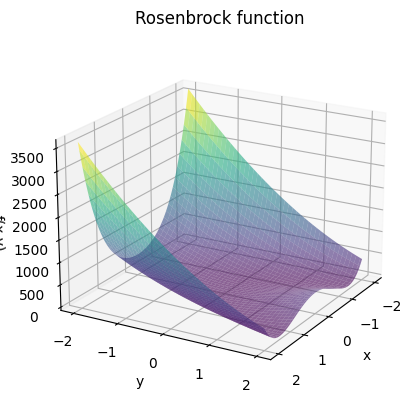

In [ ]:
# Define the Rosenbrock function
def f_rosenbrock(x):
  return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

# Create a meshgrid over the domain of interest
x = np.arange(-2, 2.01, 0.01)
y = np.arange(-2, 2.01, 0.01)
X, Y = np.meshgrid(x, y)

# Compute the function values at each point in the meshgrid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f_rosenbrock([X[i,j], Y[i,j]])

# Plot the function surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none',alpha=0.6)


# Set lighting and perspective
ax.view_init(30, 240)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Rosenbrock function')
ax.view_init(20, 30)
plt.show()

1.   Find analytically the only global optimum.
2.   Observe the behavior of the gradient method, starting from the initial points: $\vec{x}_0'=(-2,2)$, $\vec{x}_0''=(0,0)$ and $\vec{x}_0'''=(-1,0)$, using a maximum number of $50$, $500$ and $1000$ iterations.
3. Compare the sequence of solutions found by the line search methods.

1. The global optimum of the function is in $\mathbf{x}^*=(1,1)$, as we can observe computing the points where the gradient is 0.

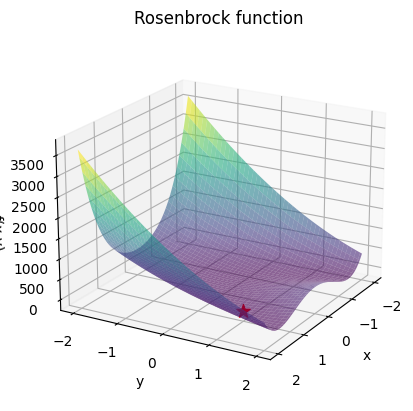

In [ ]:
# Create a meshgrid over the domain of interest
x = np.arange(-2, 2.01, 0.01)
y = np.arange(-2, 2.01, 0.01)
X, Y = np.meshgrid(x, y)

# Compute the function values at each point in the meshgrid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f_rosenbrock([X[i,j], Y[i,j]])

# Plot the function surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none',alpha=0.6)

# Add a red star to the minimum point of the Rosenbrock function
ax.scatter(1, 1, 0,c='red', marker='*', s=100)

# Set lighting and perspective
ax.view_init(30, 240)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Rosenbrock function')
ax.view_init(20, 30)
plt.show()


The implementation of the four line search methods.

In [ ]:
#### GRADIENT DESCENT ####
def steepestdescent(f, x0, epsilon, maxiterations):
    xks = [x0]
    fks = [f(x0)]
    xk = x0
    counter = 0
    error = np.inf

    while error > epsilon and counter < maxiterations:
        counter += 1
        gradf = grad_finite(f, xk)
        d = -gradf
        alpha = minimize(lambda a: f(xk + a*d), 0, method='nelder-mead').x[0]
        xk = xk + alpha*d
        error = np.linalg.norm(grad_finite(f, xk))
        fk = f(xk)

        xks.append(xk)
        fks.append(fk)

    return xk, fk, counter, error, np.array(xks), np.array(fks)

The following script runs (for the point $(-1,0)$) the gradient method on the considered function for 500 iterations, indicates the distance in norm $2$ (*optimality gap*) from the optimal solution $\mathbf{x}^*$ and prints the sequence $\{\mathbf{x}_k\}$ of points on the level curve plot.
Modify the script to run all the indicated experiments

Counter: 50
Error: 0.7319593726020681
Gap: 0.8604030474580633
Minimum value: 0.22130069403919436


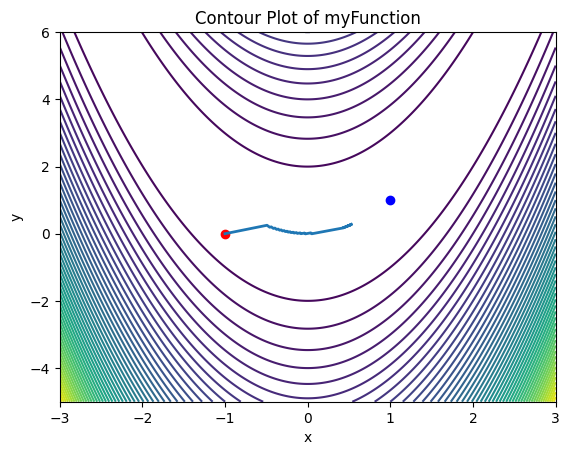

In [ ]:
# Set up the plotting range
x_lb = -3
x_ub = 3
y_lb = -5
y_ub = 6
x_step = 0.01
y_step = 0.01

# Evaluate the function over the range
x = np.arange(x_lb, x_ub + x_step, x_step)
y = np.arange(y_lb, y_ub + y_step, y_step)

X, Y = np.meshgrid(x, y)

Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
  for j in range(len(y)):
    Z[i,j] = f_rosenbrock([X.T[i,j], Y.T[i,j]])

# Plot the contour
plt.figure()
plt.contour(X.T, Y.T, Z, 50)
plt.title('Contour Plot of Rosembrock function')
plt.xlabel('x')
plt.ylabel('y')

# define the starting point and optimization parameters
x0 = np.array([-1, 0])
eps = 0.001
max_iter = 50

# plot the starting point
plt.plot(x0[0], x0[1], 'ro')

# plot the optimal point
plt.plot(1, 1, 'bo')
# run steepest descent method
xstar, fstar, counter, error, xks, fks = steepestdescent(f_rosenbrock, x0, eps, max_iter)

# plot the results
print("Counter:", counter)
print("Error:", error)
print("Gap:", np.linalg.norm(xstar - np.array([1,1])))
print("Minimum value:", fstar)
plt.plot(xks[:,0], xks[:,1],linewidth=2)

plt.show()

The experimental results show that the gradient descent converges
to a local optimum for any $\mathbf{x}_0$. The convergence speed, however, is highly sensitive to the choice of the initial solution.

Counter: 7
Error: 2.34224083473658e-05
Gap: 0.063335118780701
Minimum value: 0.0008200307251650179


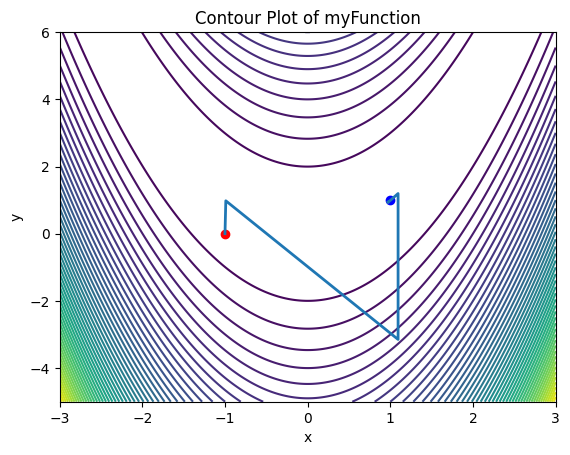

In [ ]:
# Set up the plotting range
x_lb = -3
x_ub = 3
y_lb = -5
y_ub = 6
x_step = 0.01
y_step = 0.01

# Evaluate the function over the range
x = np.arange(x_lb, x_ub + x_step, x_step)
y = np.arange(y_lb, y_ub + y_step, y_step)

X, Y = np.meshgrid(x, y)

Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
  for j in range(len(y)):
    Z[i,j] = f_rosenbrock([X.T[i,j], Y.T[i,j]])

# Plot the contour
plt.figure()
plt.contour(X.T, Y.T, Z, 50)
plt.title('Contour Plot of myFunction')
plt.xlabel('x')
plt.ylabel('y')

# define the starting point and optimization parameters
x0 = np.array([-1, 0])
eps = 0.001
max_iter = 50

# plot the starting point
plt.plot(x0[0], x0[1], 'ro')

# plot the optimal point
plt.plot(1, 1, 'bo')
# run steepest descent method
xstar, fstar, counter, error, xks, fks = newton(f_rosenbrock, x0, eps, max_iter)

# plot the results
print("Counter:", counter)
print("Error:", error)
print("Gap:", np.linalg.norm(xstar - np.array([1,1])))
print("Minimum value:", fstar)
plt.plot(xks[:,0], xks[:,1],linewidth=2)

plt.show()

The function is quadratic but not convex, so it requires more than one iteration. The convergence of the Newton method is still must faster than the gradient method.

The sequence $\left\{ \underline{x}_k\right\}$ generated by the gradient and Newton methods are depicted below (in red the first 50 iterations).
Note how, considering the same initial solution $\underline{x}_0$, the successions $\left\{ \underline{x}_k\right\}$ are significantly different.
The gradient method requires many iterations and converges to $\underline{x}^*$ very slowly. Newton method converges to $\underline{x}^*$ in very few iterations.
For points $\underline{x}_0 = \left ( -2,2\right )$ and $\underline{x}_0 =\left ( -1,0\right )$, observe that in some iterations, the direction $\underline{d}_k$ is not a *descent* direction.

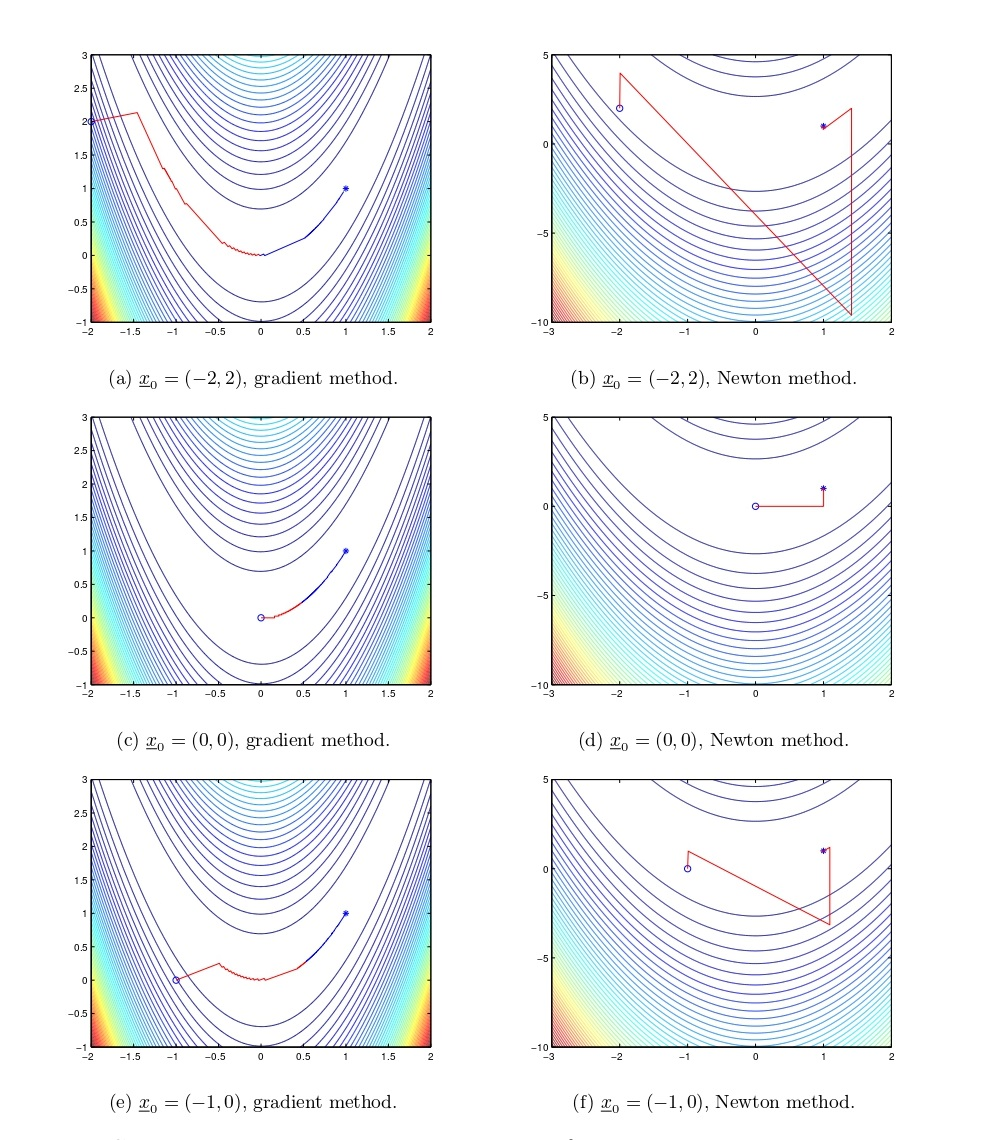

The sequence $\left\{ \underline{x}_k\right\}$ generated by the two variants are depicted below (in red the first 50 iterations).
The behavior of the two methods appears similar for $\underline{x}_0 = \left ( 0,0\right )$ and $\underline{x}_0 =\left ( -1,0\right )$, but there is
a significant difference for $\underline{x}_0 = \left ( -2,2\right )$. Looking at the value of the gradient of the solutions found with the same number of
iterations (try, e.g., 100 iterations), the one obtained with PR is significantly smaller in all the considered cases.

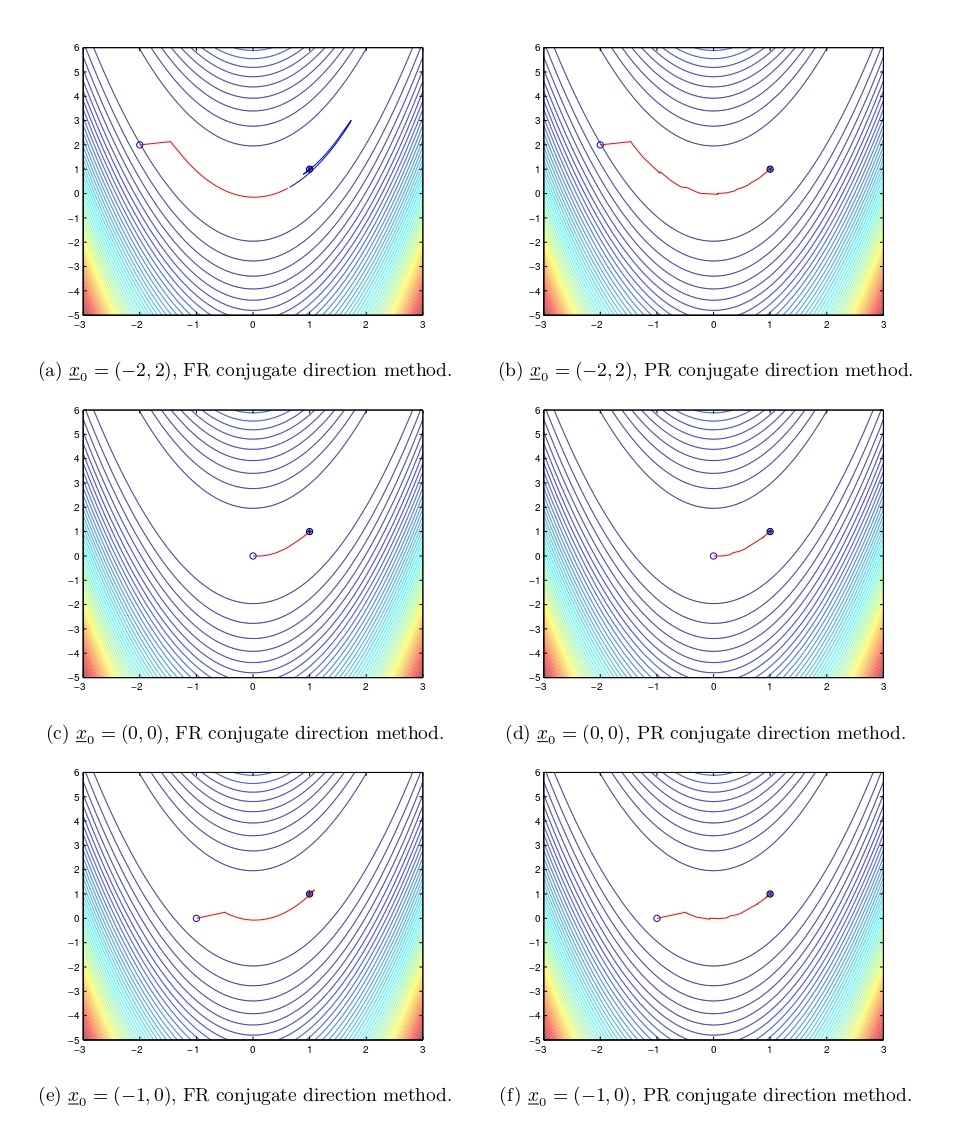

HOMEWORK: implementation of the quasi-Newton DFP method

In [ ]:
#### QUASI NEWTON METHOD ####

def DFPquasiNewton(f, x0, epsilon, maxiterations):
    n = len(x0)
    xks = [x0.T]
    fks = [f(x0)]
    M = hes_finite(f, x0)
    H = np.linalg.inv(M)
    xk = x0
    counter = 0
    error = np.inf
    gradk = grad_finite(f, xk)
    while error > epsilon and counter < maxiterations:
        counter += 1
        d = -np.dot(H, gradk)
        alpha = minimize(lambda a: f(xk + a*d), 0, method='nelder-mead').x[0]
        xk = xk + alpha * d
        gamma = grad_finite(f, xk) - gradk
        delta = np.dot(H, gamma)
        gradk = grad_finite(f, xk)
        H = H - alpha * np.dot(d, d.T) / np.dot(d.T, gamma) - np.dot(delta, delta.T) / np.dot(gamma.T, delta)
        error = np.linalg.norm(gradk)
        fk = f(xk)
        xks.append(xk.T)
        fks.append(fk)
    return xk, fk, counter, error,np.array(xks), np.array(fks)

**Exercise 1: Molecular Distance Geometry Problem**

The *Molecular Distance Geometry Problem*, or MDGP, consists in reconstructing the 3-D structure  of a molecule from information on the distances between its atoms.
Let us assume that the distances between all pairs of atoms are known (with infinite precision).
Let $D \in \mathbb{R}^{m \times m}$ the symmetrix matrix of the Euclidean distances $d_{ij}$ for each pair $\{i,j\}$. A reference is:J.M.Yoon, Y.Gad, Z.Wu,  *Mathematical modeling of protein
  structure using distance geometry*, Technical report TR00-24, DCAM,
Rice University, Houston, 2000, available from: http://www.caam.rice.edu/caam/trs/tr00.html\#TR00-24 .



Let $ \mathbf{x}^1,\ldots, \mathbf{x}^m \in \mathbb{R}^3$ the unknown positions of the atoms. We can assume w.l.o.g. that the $m$-th point has coordinates $\mathbf{x}^m=(0,0,0)$. The problem consists of determining the coordinates $\mathbf{x}^1,\ldots, \mathbf{x}^{m-1} \in \mathbb{R}^3$ of the other $m-1$ atoms so to satisfy the distances $d_{ij}$ between the pairs of atoms $i$ and $j$. The corresponding constraints are:
\begin{eqnarray*}
||\mathbf{x}^i-\mathbf{x}^j||_2 = d_{ij},& i,j=0,1,\ldots,m.
\end{eqnarray*}


1.  Give a nonlinear unconstrained optimization formulation for the problem.


1. Let us model the problem. Let $\mathbf{x}^i=(x_1^i,x_2^i,x_3^i)$ be the position of the $i$-th atom with $i = 1, \dots, m$. We are looking for a solution which satisfies all the constraints
\begin{equation}
  ||\mathbf{x}^i-\mathbf{x}^j||_2 = d_{ij} \; \; \mbox{ with } i = 1,\dots,m, j=1,\dots,m.  \qquad (3)
\end{equation}

Recall the expression of the euclidean distance $||\mathbf{x} - \mathbf{y}||_2 = \sqrt{\sum_{i} (x_i - y_i)^2}$. Since, if $||\mathbf{x}^i-\mathbf{x}^j||_2 = d_{ij}$, is also valid $||\mathbf{x}^i-\mathbf{x}^j||_2^2 = d_{ij}^2$, we can remove the nonlinearity introduced by the square root, by squaring both the terms of the equation. Observe that, since $d_{ij}$ is a given parameter of the problem, no complications are introduced by squaring it.

We can formulate an unconstrained optimization problem in which we minimize a proper function of the errors (residuals) of the constraints, which attains a minimunm in corrispondence of a vector with null errors and which is not-decreasing for increasing errors in norm. We minimize the sum of the square errors $(||\mathbf{x}^i-\mathbf{x}^j||_2^2 - d_{ij}^2)^2$. The original problem can be formulated as the following nonlinear unconstrained optimization problem:
\begin{equation}
\min_{\mathbf{x}_1 \in \mathbb{R}^3, \dots, \mathbf{x}_m \in \mathbb{R}^3}\  f(x) = \sum_{i=1}^m \sum_{j=1}^m (||\mathbf{x}^i-\mathbf{x}^j||^2-d_{ij}^2)^2. \qquad (4)
\end{equation}

Let us model the function as:

In [ ]:
def f_mdgp(x):
    f = (-2.32868 + (x[0]-x[3])**2 + (x[1]-x[4])**2 + (x[2]-x[5])**2)**2 + \
        (-6.20702 + (x[0]-x[6])**2 + (x[1]-x[7])**2 + (x[2]-x[8])**2)**2 + \
        (-14.727 + (x[0]-0)**2 + (x[1]-0)**2 + (x[2]-0)**2)**2 + \
        (-2.32868 + (x[3]-x[6])**2 + (x[4]-x[7])**2 + (x[5]-x[8])**2)**2 + \
        (-6.20702 + (x[3]-0)**2 + (x[4]-0)**2 + (x[5]-0)**2)**2 + \
        (-2.32868 + (x[6]-0)**2 + (x[7]-0)**2 + (x[8]-0)**2)**2
    return f

By simple inspection we cannot assess the convexity of the function. Therefore we assume the the whole function is not convex and we apply a global optimization method. Notice also that the expression of the residuals is nonlinear.

2.  Due to the non-convexity of the problem, implement a multistart method based on the methods implemented in the previous lab. Let:

   *   $\varepsilon > 0$ the tolerance of the multistart algorithm
   *   $\bar{f}$ the known optimal value of the objective function
   *   $M$ the maximum number of multistart iterations

     The multistart algorithm is as follows:

     1.   Let $\mathbf{x}$ be a point in $\mathbb{R}^{3\left ( m-1 \right )}$. Let $\mathbf{x}^\ast\leftarrow\mathbf{x}$.
     2.   If $f(\mathbf{x}^\ast) < \bar{f} + \varepsilon$ or if more than $M$ iterations, the algorithm stops; otherwise, go to step 3).
     3. Find local minimum $\mathbf{x}'=(x^1,\ldots,x^{m-1})$ from initial point $\mathbf{x}$, with a nonlinear optimization method (with a tolerance $\varepsilon' >0$ and a maximum number of iterations $M'$).
     4. If $f(\mathbf{x}')<f(\mathbf{x}^*)$ update $\mathbf{x}^\ast\leftarrow \mathbf{x}'$.
     5. Find new initial point $\mathbf{x}\in\mathbb{R}^{3\left ( m-1 \right )}$, randomly.
     6. Go to step 2.





2. Since in the optimal solution of problem (4) all the constraints (3) are satisfied (by the hypothesis on the data), the value of the objective function in the optimal solution amounts to $\bar{f}=0$. Therefore it is possible to stop the algorithm when the error between the current solution and the optimal one falls below a prefixed constant  $\varepsilon> 0$.

Multistart method: Find an approximate solution $\mathbf{x}^\ast$ with value $f(\mathbf{x}^\ast)$, given:

* an objective function to be optimized *f*
* the number of components of the solution *n*
* a global sub-optimality tolerance *eps*
* a local sub-optimality tolerance *localeps*
* a limit on the maximum number of multistart iterations *maxit*
*  a limit on the maximum number of iterations of the local nonlinear optimization method *maxlocalit*
* the local nonlinear optimization method *myLocalOptimAlg*




In [ ]:
def multistart(f, n, eps, localeps, maxit, maxlocalit, myLocalOptimAlg):
    fstars = [] # estimate of the optimal value of the global objective function
    nstars = [] # iteration in which is updated the estimate of the optimal value
    flocals = [] # optimal value of the local objective function

    bound = 5
    x = np.random.uniform(-bound,bound,n)
    xstar = x
    counter = 0
    termination = 0

    while termination == 0:
        fstar = f(xstar)
        if fstar < eps or counter >= maxit:
            termination = 1
        else:
            counter += 1
            xlocal, flocal, count, err,_,_ = myLocalOptimAlg(f,x,localeps,maxlocalit)
            flocals.append(flocal)
            if flocal < fstar:
                xstar = xlocal
                fstar = flocal
                error = err
                fstars.append(fstar)
                nstars.append(counter)
            x = np.random.uniform(-bound,bound,n)

    return xstar, fstar, counter, error, flocals, fstars, nstars

3. Apply the algorithm to the following instance with $m=4$ atoms ($d_{ii} = 0$ for any $i$):

| $d_{ij}$ | 2 | 3 | 4|
| --- | --- | --- | --- |
| 1 | 1.526 | 2.491389536 | 3.837572036 |
| 2 | 0 | 1.526 | 2.491389535 |
| 3 | - | 0 | 1.526 |

The script below runs the algorithm with tolerance *eps = 0.001*, $15$ as maximum number of iterations for every call of the local nonlinear optimization method (in this case the steepest descent has been chosen) and $150$ as maximum number of multistart iterations. The number of problem variables is $\left (4 - 1\right )\times 3 = 9$. In this case, also for the tolerance of the local method we set *localeps = 0.001 = eps*, but, in general, the two tolerances can be chosen differently: indeed, *eps* concerns the distance in absolute value of the objective function from the known optimal value, while *localeps* concerns the 2-norm of the gradient vector.  

[ 0.15719974 -1.28990765 -3.61258102 -0.10372429 -1.3272153  -2.10816499
  0.38469471 -0.02176636 -1.47767742]
0.0005206029810311919


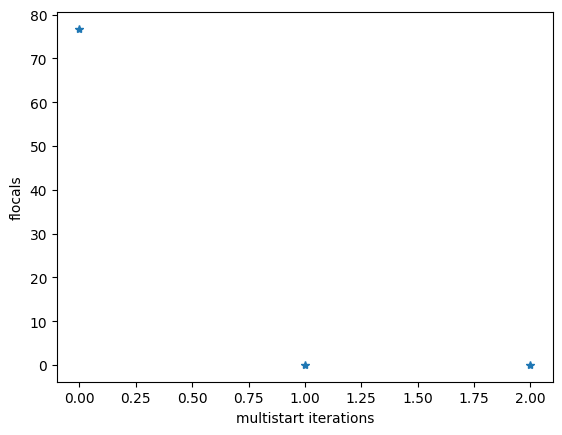

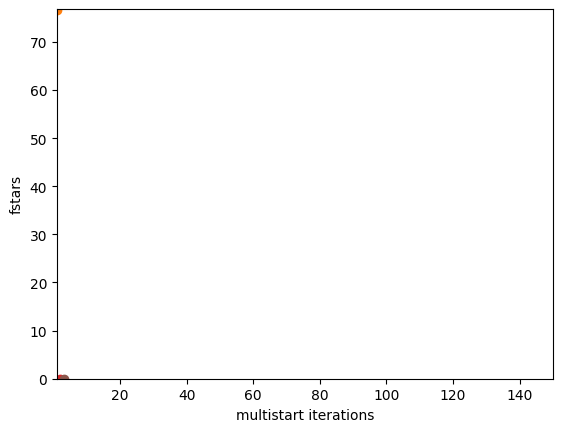

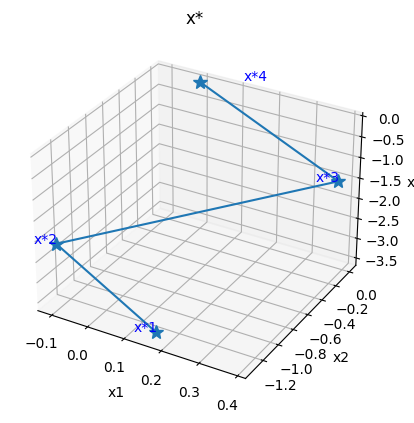

In [ ]:
m=3
n = 3*m
localeps = 0.001
eps = 0.001
# maximum number of multistart iterations
max_iter = 150
# maximum number of local algorithm iterations
max_local_iter = 15
# set seed (to allow for reproducible results)
np.random.seed(789)# 3245

myLocalOptimAlg = newton # newton
# call the multistart method
xstar, fstar, counter, error, flocals, fstars, nstars = multistart(f_mdgp, n, eps, localeps, max_iter, max_local_iter, myLocalOptimAlg)

print(xstar)
print(fstar)

# plot flocals
plt.figure()
plt.plot(flocals, '*')
plt.xlabel('multistart iterations')
plt.ylabel('flocals')

# plot fstars
plt.figure()
plt.axis([1, max_iter, 0, fstars[0]+0.1])
for i in range(len(nstars)-1):
    plt.plot([nstars[i], nstars[i+1]], [fstars[i], fstars[i]], linewidth=2)
    plt.plot(nstars[i], fstars[i], 'o', linewidth=2)
plt.plot([nstars[-1], counter], [fstars[-1], fstars[-1]], linewidth=2)
plt.plot(nstars[-1], fstars[-1], 'o', linewidth=2)
plt.xlabel('multistart iterations')
plt.ylabel('fstars')

# plot xstar
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot([xstar[0], xstar[3], xstar[6], 0],
        [xstar[1], xstar[4], xstar[7], 0],
        [xstar[2], xstar[5], xstar[8], 0], '-*', markersize=10)
ax.text(xstar[0]-0.05, xstar[1]-0.05, xstar[2]-0.05, 'x*1', color='blue')
ax.text(xstar[3]-0.05, xstar[4]-0.05, xstar[5]-0.05, 'x*2', color='blue')
ax.text(xstar[6]-0.05, xstar[7]-0.05, xstar[8]-0.05, 'x*3', color='blue')
ax.text(0.1, 0.1, 0.1, 'x*4', color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('x*')
plt.show()


By comparing the results obtained by the steepest descent and the Newton methods with the sequence of generated random numbers, it is possible to observe that:

* with the Newton method the number of multistart iterations is much lower:  this result is consistent with the theory, as, if the starting point $\mathbf{x}_0$ is good enough, the Newton method  exhibits a faster convergence rate with respect to the steepest descent;
* concerning the optimal local solutions obtained at each multistart iteration (see the plot flocals vs multistart iterations), the range of the values provided by the Newton method is about (0,77), while the one of the steepest descent is about (0,0.22): also this result is consistent with the theory, as, the steepest descent method is less sensitive than the Newton method with respect to the starting point $\mathbf{x}_0$ (try to change the seed to see how the Newton method is sensitive to the starting point).  

4. Apply the Gauss-Newton Method for the solution of nonlinear least square problems. We provide the  jac function that computes the Jacobian at x of a vector function r with m components.
The second parameter represents the number of components.

In [ ]:
def jac(f, m, x,tol=1e-4):
    n = len(x)
    J = np.zeros((m,n))

    for i in range(m):
        for j in range(n):
            delta = np.zeros(n)
            delta[j] = tol
            rd = f(x+delta)
            rx = f(x)
            J[i,j] = (rd[i] - rx[i]) / tol
    return J


**Gauss-Newton method**

It is a variant of Newton method for nonlinear least squares problem. Consider:
\begin{align}
f(\mathbf{x})=\sum_{i=1}^m(r_i(\mathbf{x}))^2, & & (1)
\end{align}
where $\mathbf{x} \in R^n$ and $r(\mathbf{x})=(r_1(\mathbf{x}),\ldots,r_m(\mathbf{x}))^T$ is the vector of residuals. Assume $r_i(\mathbf{x})$ are nonlinear.


Differentiating (1) we obtain
\begin{align}
\nabla_{\mathbf{x}} f(\mathbf{x})=\sum_{i=1}^m2 r_i(\mathbf{x})\nabla_{\mathbf{x}} r_i(\mathbf{x}).
\end{align}

Let ${\bf J}_{\mathbf{x}} \mathbf{r}(\mathbf{x})=\left\{ \frac{\partial r_i}{\partial
x_k}\right\}_{ik}$ the Jacobian of $\mathbf{r}$ at $\mathbf{x}$: we indicate ${\bf J}_{\mathbf{x}} \mathbf{r}(\mathbf{x})$ with ${\bf J}\left (\mathbf{x}\right )$. Observe ${\bf J}\left (\mathbf{x}\right ) =
\left( \begin{array}{c}
       \nabla_{\mathbf{x}}^T r_1(\mathbf{x})\\
       \vdots\\
       \nabla_{\mathbf{x}}^T r_m(\mathbf{x})
       \end{array}
\right)$.
We can write the expression as:
\begin{align}
\nabla f(\mathbf{x})=2 {\bf J}_{\mathbf{x}}\mathbf{r}(\mathbf{x})^T \mathbf{r}(\mathbf{x}).
\end{align}

The Hessian of $f$ at $\mathbf{x}$, that we indicate with ${\bf H} \left ( \mathbf{x}\right )$, is
\begin{align}
{\bf H} \left ( \mathbf{x}\right )=2{{\bf J}\left (\mathbf{x}\right )}^T{\bf J}\left (\mathbf{x}\right )+2\sum_{i=1}^m(r_i(\mathbf{x}))\nabla^2
r_i(\mathbf{x}). & & (2)
\end{align}
If the residuals are small, we can discard the last term in
(2), leading to
\begin{align}
{\bf H} \left ( \mathbf{x}\right )\approx 2
{{\bf J}\left (\mathbf{x}\right )}^T{\bf J}\left (\mathbf{x}\right ).
\end{align}

Observe that, if the residuals are linear in $\mathbf{x}$, then $\nabla^2 r_i(\mathbf{x})= 0$ for any $i$, so the second-order approximation is exact and the method is the same as the one for linear least squares.

The Netwon method step:
\begin{align}
  \mathbf{x}_{k+1}=
\mathbf{x}_k-{\left [{\bf H} \left ( \mathbf{x}_k\right )\right ]}^{-1}\nabla f(\mathbf{x}_k)
\end{align}
corresponds, using approximation  of the Hessian to the first derivative, to:
\begin{align}
\mathbf{x}_{k+1}=\mathbf{x}_k- \left [{{\bf J}\left (\mathbf{x}_k\right )}^T{\bf J}\left (\mathbf{x}_k\right )\right ]^{-1}{{\bf J}\left (\mathbf{x}_k\right )}^T \mathbf{r}(\mathbf{x}_k).
\end{align}

For the convergence of Gauss-Newton, the inital solution must be sufficiently close to a stationary point of $f$ and the discarded terms (2) must be small. Observe that the method does not need to compute the Hessian ${\textbf{H}}\left (\mathbf{x}\right )$, that would imply computing the Hessian $\nabla^2r_i$ for each $r_i$.

4. Observe that, to implemtent the Gauss-Newton method, we must provide the residuals vector $\mathbf{r}$, implemented here in function r_mdgp:

In [ ]:
def r_mdgp(x):
    r = np.zeros(6)
    r[0] = -2.32868 + (x[0]-x[3])**2 + (x[1]-x[4])**2 + (x[2]-x[5])**2
    r[1] = -6.20702 + (x[0]-x[6])**2 + (x[1]-x[7])**2 + (x[2]-x[8])**2
    r[2] = -14.727 + (x[0]-0)**2 + (x[1]-0)**2 + (x[2]-0)**2
    r[3] = -2.32868 + (x[3]-x[6])**2 + (x[4]-x[7])**2 + (x[5]-x[8])**2
    r[4] = -6.20702 + (x[3]-0)**2 + (x[4]-0)**2 + (x[5]-0)**2
    r[5] = -2.32868 + (x[6]-0)**2 + (x[7]-0)**2 + (x[8]-0)**2
    return r

We implement the Gauss-Newton method

In [ ]:
def gaussnewton(r, x0, epsilon, maxiterations):

    xks = [x0]
    fks = [np.linalg.norm(r(x0))**2]
    xk = x0
    counter = 0
    error = np.inf

    while error > epsilon and counter < maxiterations:
        counter += 1

        J = jac(r, 6, xk)
        d = -np.linalg.pinv(J).dot(r(xk))
        alpha = 1
        xk = xk + alpha * d

        fk = np.linalg.norm(r(xk))**2
        error = fk

        xks.append(xk)
        fks.append(fk)

    return xk, fk, counter, error, np.array(xks), np.array(fks)




We choose arbitrarily the starting point $\mathbf{x}_0 = (0,0,0,0,0,0,0,0,0)$

[ 2.04476337  2.87141233 -1.5179161   1.65395545  1.79489418 -0.50308607
  0.53179378  0.93758215 -1.0815709 ]
0.00034168098751156885


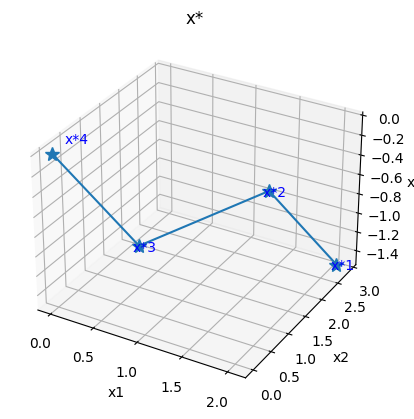

In [ ]:
m=3
n = 3*m
localeps = 0.001
eps = 0.001
# maximum number of multistart iterations
max_iter = 100
x0 = np.zeros(9)
myLocalOptimAlg = gaussnewton # newton
# call the multistart method
xstar, fstar, counter, error, xks, fks = gaussnewton(r_mdgp, x0, localeps, max_iter)

print(xstar)
print(fstar)


# plot xstar
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot([xstar[0], xstar[3], xstar[6], 0],
        [xstar[1], xstar[4], xstar[7], 0],
        [xstar[2], xstar[5], xstar[8], 0], '-*', markersize=10)
ax.text(xstar[0]-0.05, xstar[1]-0.05, xstar[2]-0.05, 'x*1', color='blue')
ax.text(xstar[3]-0.05, xstar[4]-0.05, xstar[5]-0.05, 'x*2', color='blue')
ax.text(xstar[6]-0.05, xstar[7]-0.05, xstar[8]-0.05, 'x*3', color='blue')
ax.text(0.1, 0.1, 0.1, 'x*4', color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('x*')
plt.show()


In [ ]:
def f_mdgp(x):
    f = (-2.32868 + (x[0]-x[3])**2 + (x[1]-x[4])**2 + (x[2]-x[5])**2)**2 + \
        (-6.20702 + (x[0]-x[6])**2 + (x[1]-x[7])**2 + (x[2]-x[8])**2)**2 + \
        (-14.727 + (x[0]-0)**2 + (x[1]-0)**2 + (x[2]-0)**2)**2 + \
        (-2.32868 + (x[3]-x[6])**2 + (x[4]-x[7])**2 + (x[5]-x[8])**2)**2 + \
        (-6.20702 + (x[3]-0)**2 + (x[4]-0)**2 + (x[5]-0)**2)**2 + \
        (-2.32868 + (x[6]-0)**2 + (x[7]-0)**2 + (x[8]-0)**2)**2
    return f

def r_mdgp(x):
    r = np.zeros(6)
    r[0] = -2.32868 + (x[0]-x[3])**2 + (x[1]-x[4])**2 + (x[2]-x[5])**2
    r[1] = -6.20702 + (x[0]-x[6])**2 + (x[1]-x[7])**2 + (x[2]-x[8])**2
    r[2] = -14.727 + (x[0]-0)**2 + (x[1]-0)**2 + (x[2]-0)**2
    r[3] = -2.32868 + (x[3]-x[6])**2 + (x[4]-x[7])**2 + (x[5]-x[8])**2
    r[4] = -6.20702 + (x[3]-0)**2 + (x[4]-0)**2 + (x[5]-0)**2
    r[5] = -2.32868 + (x[6]-0)**2 + (x[7]-0)**2 + (x[8]-0)**2
    return r


[ 3.26206574  1.37243468 -1.48078306  2.3231315   0.34028874 -0.83919025
  0.94300947  0.98185411 -0.67453729]
0.0024159897664975385


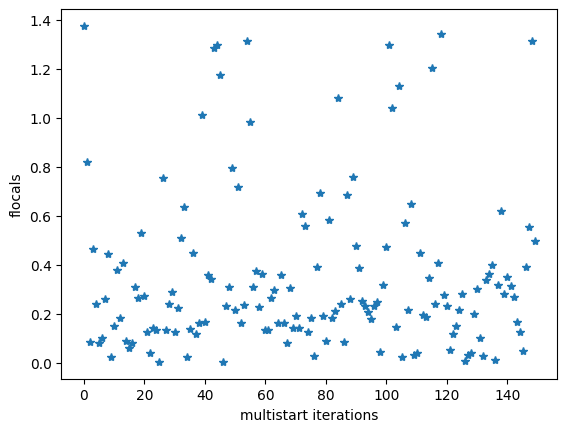

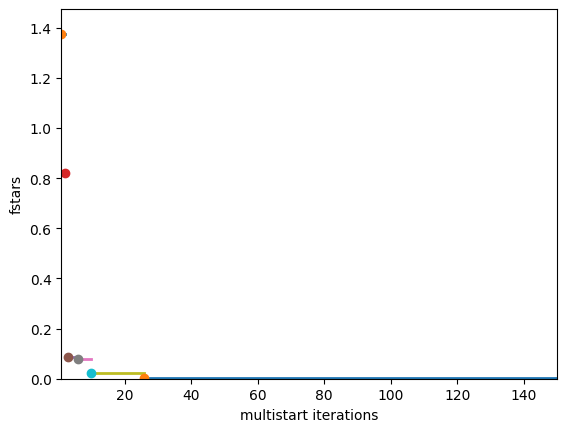

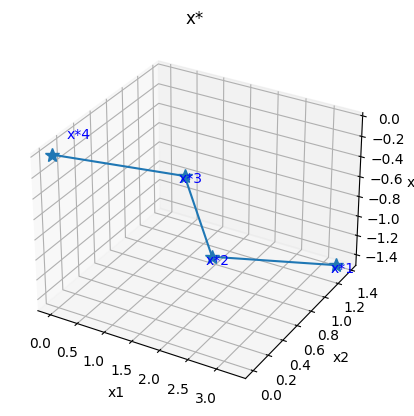

[1, 2, 3, 6, 10, 26]
[1.3748106655229497, 0.8199047614566821, 0.08472109475318725, 0.07967402918018865, 0.024021836928400337, 0.0024159897664975385]
counter
150


In [ ]:
m=3
n = 3*m
localeps = 0.001
eps = 0.001
# maximum number of multistart iterations
max_iter = 150
# maximum number of local algorithm iterations
max_local_iter = 15
# set seed (to allow for reproducible results)
np.random.seed(3245)

myLocalOptimAlg = steepestdescent # newton
# call the multistart method
xstar, fstar, counter, error, flocals, fstars, nstars = multistart(f_mdgp, n, eps, localeps, max_iter, max_local_iter, myLocalOptimAlg)

print(xstar)
print(fstar)

# plot flocals
plt.figure()
plt.plot(flocals, '*')
plt.xlabel('multistart iterations')
plt.ylabel('flocals')

# plot fstars
plt.figure()
plt.axis([1, max_iter, 0, fstars[0]+0.1])
for i in range(len(nstars)-1):
    plt.plot([nstars[i], nstars[i+1]], [fstars[i], fstars[i]], linewidth=2)
    plt.plot(nstars[i], fstars[i], 'o', linewidth=2)
plt.plot([nstars[-1], counter], [fstars[-1], fstars[-1]], linewidth=2)
plt.plot(nstars[-1], fstars[-1], 'o', linewidth=2)
plt.xlabel('multistart iterations')
plt.ylabel('fstars')

# plot xstar
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot([xstar[0], xstar[3], xstar[6], 0],
        [xstar[1], xstar[4], xstar[7], 0],
        [xstar[2], xstar[5], xstar[8], 0], '-*', markersize=10)
ax.text(xstar[0]-0.05, xstar[1]-0.05, xstar[2]-0.05, 'x*1', color='blue')
ax.text(xstar[3]-0.05, xstar[4]-0.05, xstar[5]-0.05, 'x*2', color='blue')
ax.text(xstar[6]-0.05, xstar[7]-0.05, xstar[8]-0.05, 'x*3', color='blue')
ax.text(0.1, 0.1, 0.1, 'x*4', color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('x*')
plt.show()
